In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mp
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

In [76]:
data = pd.read_csv('cluster.csv', delimiter = '\t' )

In [77]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [78]:
# DIMENSSION DU DATASET
data.shape

(2240, 29)

In [79]:
# TYPES DES VARIABLES
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [80]:
# CHECK LES VALEURS MANQUANTE
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [81]:
# SUPPRIME LES VALEURS MANQUANTES
df = data.dropna(axis = 0)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [82]:
# DIMENSSION DU NOUVEAU DATASET
df.shape

(2216, 29)

In [83]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [84]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [85]:
# INDIQUER QUE LA COLONE 'Dt_Customer' EST DE TYPE DATE
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'],format = '%d-%m-%Y')

In [86]:
data.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [87]:
# DEFINITION DES METRICS DE BASE POUR LA SEGMENTATION

In [88]:
# CREATION DE VARIABLE DE METRICS
# -- DEPENSSIER (3 CLASSES)
# -- ANCIEN_OU_VOUVEAU (3 CLASSES)
# -- POTENTIEL (3 CLASSES)
# -- NOMBRE D'ENFANTS
# -- AGE DU CLIENT
# -- VIE SEUL ?
# -- NIVEAU ACADEMIQUE

## Création d'une variable 'ANCIEN_OU_VOUVEAU' qui mesure l'ancienete du client

In [89]:
# Liste des dates d'enregistrement

dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
print('Le premier client est enregistré le : ', min(dates) )
print('Le dernier client est enregistré le : ', max(dates) )

Le premier client est enregistré le :  2012-07-30
Le dernier client est enregistré le :  2014-06-29


In [90]:
# Le nombre de jour qu'un clients a passé sur la plateforme par rapport au dernier venu

days = []
d_1 = max(dates) #le dernier client à s'etre enregistré
for i in dates:
    delta = d_1 - i
    days.append(delta)
data["ANCIEN_OU_NOUVEAU"] = days
data["ANCIEN_OU_NOUVEAU"] = pd.to_numeric(data["ANCIEN_OU_NOUVEAU"], errors="coerce")

In [91]:
# L'AGE DU CLIENT

data["Age"] = 2021-data["Year_Birth"]

In [92]:
# Vie seul ou à 2

data["vie_seul_?"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [93]:
# DEPENSSIER

data["depense"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [94]:
# NOMBRE D'ENFANTS

data["nb_enfants"]=data["Kidhome"]+data["Teenhome"]

In [95]:
# TAILLE DE LA FAMILLE

data["taille_famille"] = data["vie_seul_?"].replace({"Alone": 1, "Partner":2})+ data["nb_enfants"]

In [96]:
# NIVEAU ACADEMIQUE


data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [98]:
# PARENT ?

data["Parent ?"] = np.where(data.nb_enfants> 0, 1, 0)

In [99]:
# SUPPRESSION DE COLONES JUGE NON NECESSAIRE

suppr_col = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(suppr_col, axis=1)

In [100]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,ANCIEN_OU_NOUVEAU,Age,vie_seul_?,depense,nb_enfants,taille_famille,Parent ?
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,57283200000000000,64,Alone,1617,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,9763200000000000,67,Alone,27,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,26956800000000000,56,Partner,776,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,12009600000000000,37,Partner,53,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,13910400000000000,40,Partner,422,1,3,1


In [101]:
['ANCIEN_OU_NOUVEAU_r'] = data['ANCIEN_OU_NOUVEAU'] / 86400

In [102]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,ANCIEN_OU_NOUVEAU,Age,vie_seul_?,depense,nb_enfants,taille_famille,Parent ?,ANCIEN_OU_NOUVEAU_r
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,1,57283200000000000,64,Alone,1617,0,1,0,6.630000e+11
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,9763200000000000,67,Alone,27,2,3,1,1.130000e+11
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,26956800000000000,56,Partner,776,0,2,0,3.120000e+11
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,12009600000000000,37,Partner,53,1,3,1,1.390000e+11
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,13910400000000000,40,Partner,422,1,3,1,1.610000e+11


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

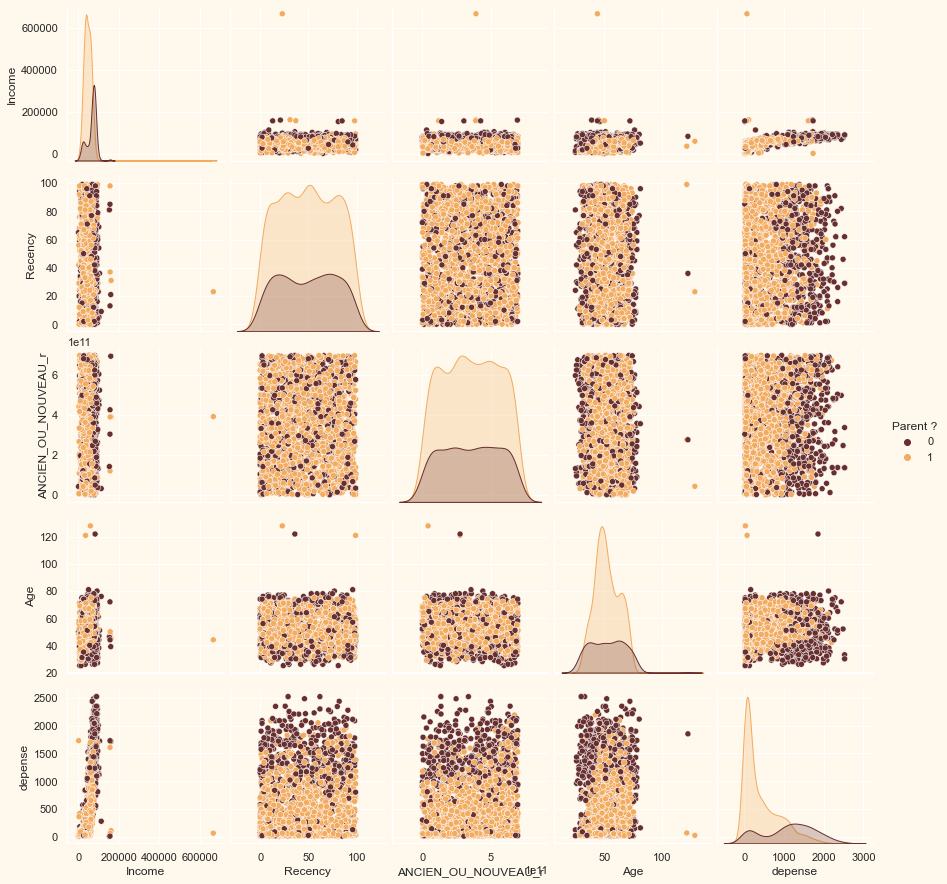

In [114]:
# VISUALISATION DE CERTAINE VARIABLE

#configuration couleur
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = mp.colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#visualisation
To_Plot = [ "Income", "Recency", "ANCIEN_OU_NOUVEAU_r", "Age", "depense", "Parent ?"]
#print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Parent ?",palette= (["#682F2F","#F3AB60"]))

plt.show()

Ooops des valeurs abérantes, qu'on va supprimer biensûre

In [117]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<150000)]
print("Apres suppression il nous reste :", len(data))

Apres suppression il nous reste : 2205


<Figure size 432x288 with 0 Axes>

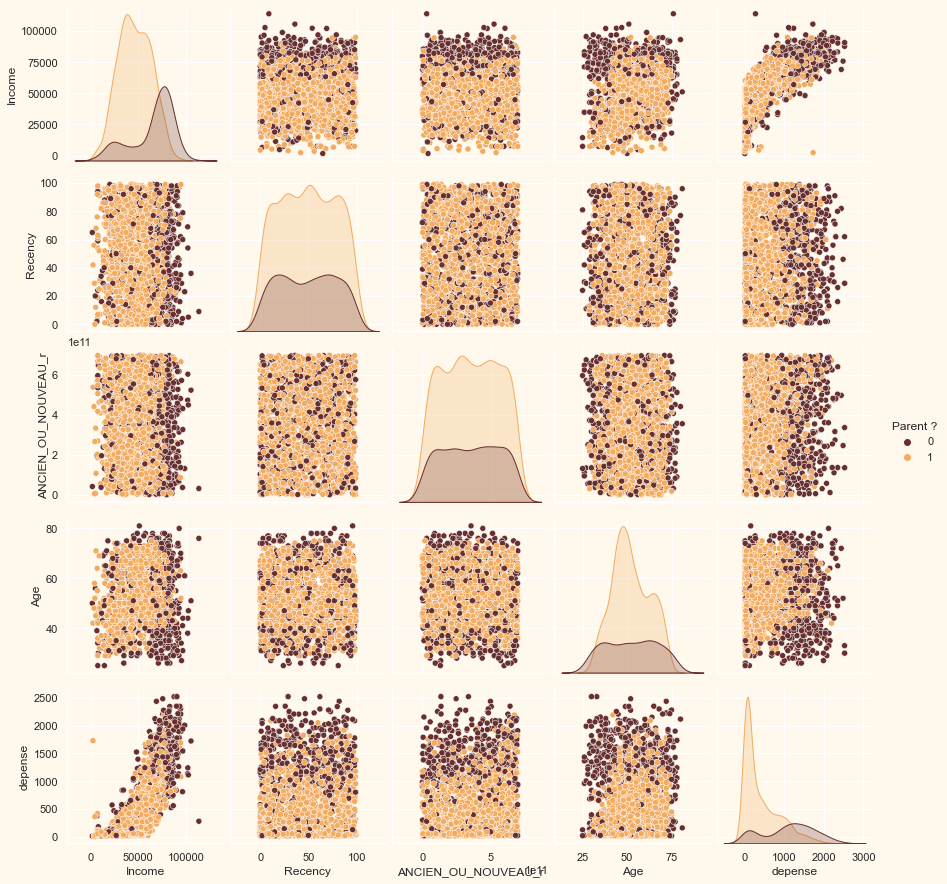

In [118]:
plt.figure()
sns.pairplot(data[To_Plot], hue= "Parent ?",palette= (["#682F2F","#F3AB60"]))

plt.show()

On observe la distribution des variables en du fait que le client soit parent ou pas

## EVALUATION DES CORRELATIONS ENTRE LES VARIABLES

<AxesSubplot:>

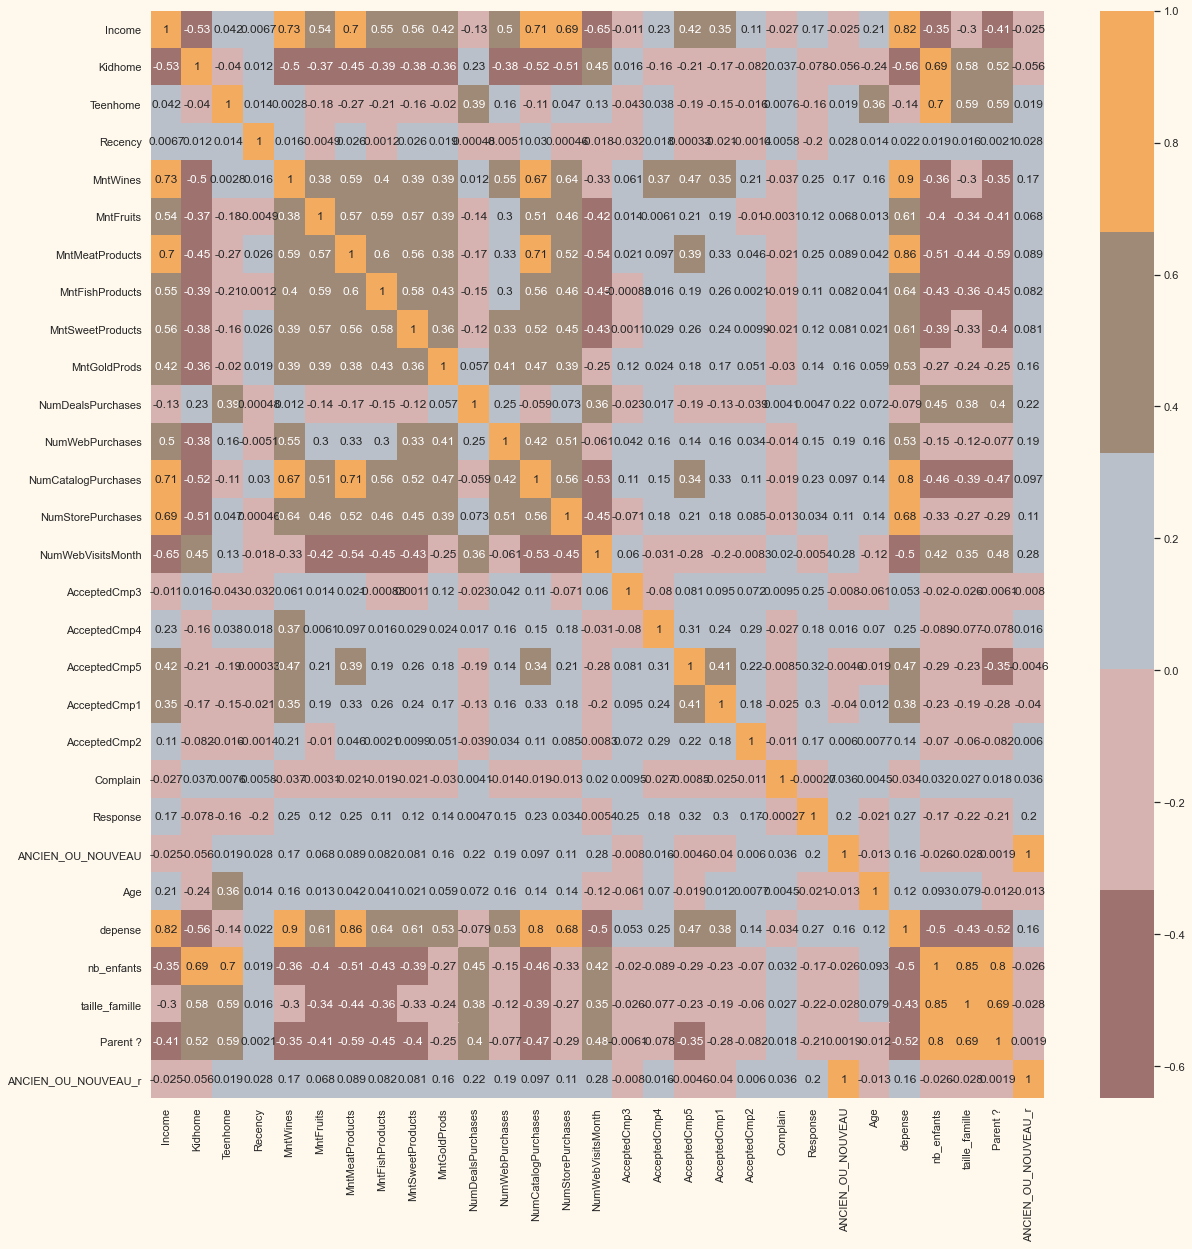

In [121]:
# MATRICE DE CORRELATION

mat_corr= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(mat_corr, annot=True, cmap=cmap, center=0)

In [122]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

In [125]:
encod=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(encod.fit_transform)
    
print("encodage effectué")

encodage effectué
